# Effects on Stock Prices due to Adding and Removal from SP500

In this project I will analyze the effects adding/removing has on a stock's price as well as
attempt to identify some patterns between stocks pre-addition and pre-drop to make for the most efficient investment opportunities.

In [147]:
# Imports

import pandas as pd
import hvplot.pandas
import sqlalchemy
from dotenv import load_dotenv
from pathlib import Path
import os
import time
import yfinance as yf


load_dotenv('data/.env')
AVAPI = os.getenv('Alpha_Vantage_API')

database_connection_string = 'sqlite:///SP500.db'
engine = sqlalchemy.create_engine(database_connection_string)

# Most Recent Changes to SP500

I will inspect some of these changes


In [148]:
SP500_Changes = pd.read_csv(Path("Data/SP500_changes.csv"), index_col='date', parse_dates=True, infer_datetime_format=True)
print('The 5 Most Recent Changes to the SP500 are:')
SP500_Changes.head()

The 5 Most Recent Changes to the SP500 are:


,Unnamed: 0,ticker,name,action,cik
date,,,,,
2016-09-08,112,CHTR,Charter Communications,added,NaN
2016-09-08,112,EMC,EMC Corporation,removed,NaN
2016-09-06,113,MTD,Mettler Toledo,added,NaN
2016-09-06,113,TYC,Tyco International,removed,NaN
2012-09-05,208,LYB,LyondellBasell,added,NaN


# Pulling Stock Price Before Removal from SP500

In [149]:
gnw = yf.Ticker('GNW')
gnw_df = gnw.history (period='max')

# BEFORE REMOVAl
gnw_df = gnw_df.loc['2010-11-18':'2015-11-18']

# AFTER REMOVAL 
# gnw_df = gnw_df.loc['2015-11-18': ]

display(gnw_df.drop(columns= ['Dividends', 'Stock Splits']))

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-18,11.63,11.74,11.51,11.54,6075900
2010-11-19,11.51,11.67,11.41,11.58,4357300
2010-11-22,11.47,11.48,11.15,11.38,7815300
2010-11-23,11.17,11.35,11.10,11.29,7400400
2010-11-24,11.36,11.75,11.36,11.75,5763500
...,...,...,...,...,...
2015-11-12,4.69,4.75,4.59,4.61,7115300
2015-11-13,4.60,4.75,4.57,4.68,7486900
2015-11-16,4.62,4.85,4.58,4.84,7316700


<AxesSubplot:title={'center':'GNW Closing Price After Index Removal'}, xlabel='Date', ylabel='Closing Price in $'>

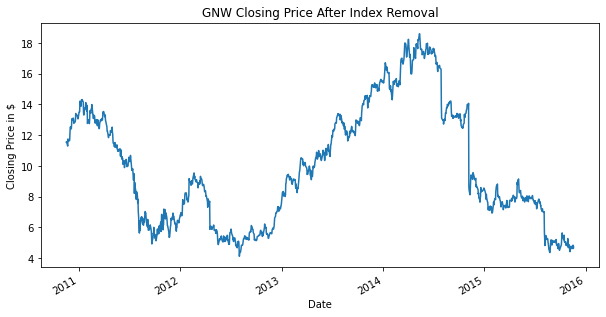

In [150]:
#Plotting 5 years of Closing Stock Price before REMOVAL from SP500 
gnw_df['Close'].plot(title='GNW Closing Price After Index Removal', figsize=(10,5), ylabel='Closing Price in $')


In [151]:
#Looking into (XRX) Xerox
xrx = yf.Ticker('XRX')
xrx_df = xrx.history (period='max')
xrx_df = xrx_df.loc['2017-3-22': '2021-03-22']

display(xrx_df.drop(columns= ['Dividends', 'Stock Splits']))


,Open,High,Low,Close,Volume
Date,,,,,
2017-03-22,23.873381,23.873381,23.509154,23.774046,1771325
2017-03-23,23.774048,24.072052,23.740937,23.840271,1497375
2017-03-24,23.939601,24.005824,23.674710,23.807156,1679475
2017-03-27,23.641600,23.840268,23.476043,23.641600,1914000
2017-03-28,23.641597,24.502496,23.608486,24.303827,3037600
...,...,...,...,...,...
2021-03-16,25.015395,25.034542,24.335682,24.527151,2233100
2021-03-17,24.517579,24.948382,24.364404,24.910089,2507900
2021-03-18,24.728191,25.053688,23.722981,23.742126,2836900


<AxesSubplot:title={'center':'XRX Closing Price BEFORE Index Removal'}, xlabel='Date', ylabel='Closing Price in $'>

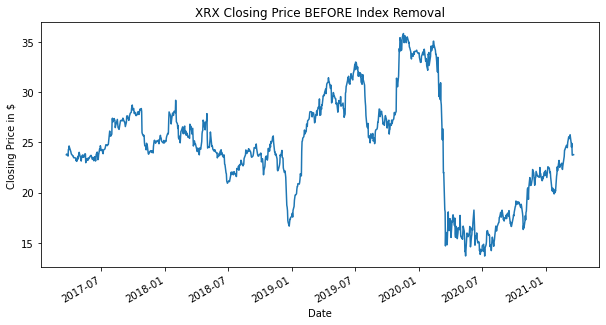

In [152]:
#Plotting 5 years of Closing Stock Price after REMOVAL from SP500 
xrx_df['Close'].plot(title='XRX Closing Price BEFORE Index Removal', figsize=(10,5), ylabel='Closing Price in $')


# Pulling Stock Price Before Addition to SP500

In [153]:
#Looking into (CHTR) 
chtr = yf.Ticker('CHTR')
chtr_df = chtr.history (period='max')
chtr_df = chtr_df.loc['2011-09-08': '2016-09-08']

display(chtr_df.drop(columns= ['Dividends', 'Stock Splits']))

,Open,High,Low,Close,Volume
Date,,,,,
2011-09-08,49.349998,49.889999,48.650002,48.889999,433900
2011-09-09,48.459999,48.900002,46.410000,46.709999,321400
2011-09-12,46.099998,47.130001,45.830002,46.860001,339200
2011-09-13,47.040001,48.180000,46.639999,47.639999,224400
2011-09-14,48.040001,49.580002,47.759998,49.230000,212800
...,...,...,...,...,...
2016-09-01,267.000000,272.809998,264.369995,268.820007,7872000
2016-09-02,268.679993,272.959991,268.679993,271.790009,3715000
2016-09-06,279.950012,279.950012,270.019989,274.670013,5043800


<AxesSubplot:title={'center':'CHTR Closing Price BEFORE Index ADDITION'}, xlabel='Date', ylabel='Closing Price in $'>

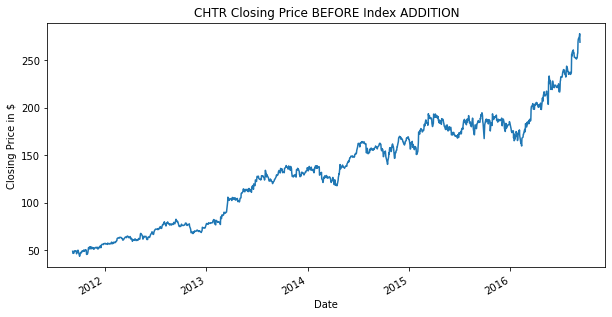

In [154]:
chtr_df['Close'].plot(title='CHTR Closing Price BEFORE Index ADDITION', figsize=(10,5), ylabel='Closing Price in $')

In [155]:
#Looking into (MTD) Mettler Toledo
mtd = yf.Ticker('MTD')
mtd_df = mtd.history (period='max')
mtd_df = mtd_df.loc['2011-09-06': '2016-09-06']

display(mtd_df.drop(columns= ['Dividends', 'Stock Splits']))

,Open,High,Low,Close,Volume
Date,,,,,
2011-09-06,149.699997,152.720001,147.770004,152.389999,341300
2011-09-07,155.059998,159.289993,154.759995,159.289993,150500
2011-09-08,157.850006,159.589996,156.710007,157.520004,154800
2011-09-09,155.660004,157.440002,147.449997,147.929993,477200
2011-09-12,146.050003,148.449997,144.179993,147.039993,389000
...,...,...,...,...,...
2016-08-30,406.760010,408.450012,402.600006,404.329987,268500
2016-08-31,408.480011,408.480011,402.010010,403.070007,346000
2016-09-01,404.079987,407.309998,401.250000,404.720001,258800


<AxesSubplot:title={'center':'MTD Closing Price BEFORE Index ADDITION'}, xlabel='Date', ylabel='Closing Price in $'>

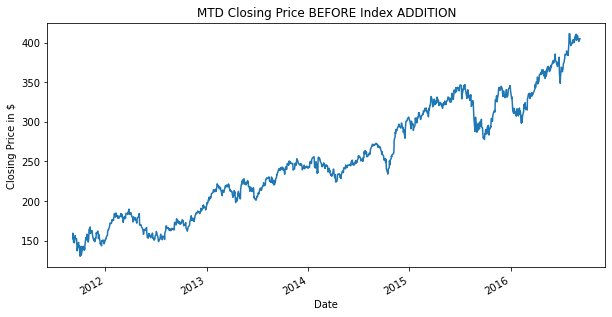

In [156]:
mtd_df['Close'].plot(title='MTD Closing Price BEFORE Index ADDITION', figsize=(10,5), ylabel='Closing Price in $')